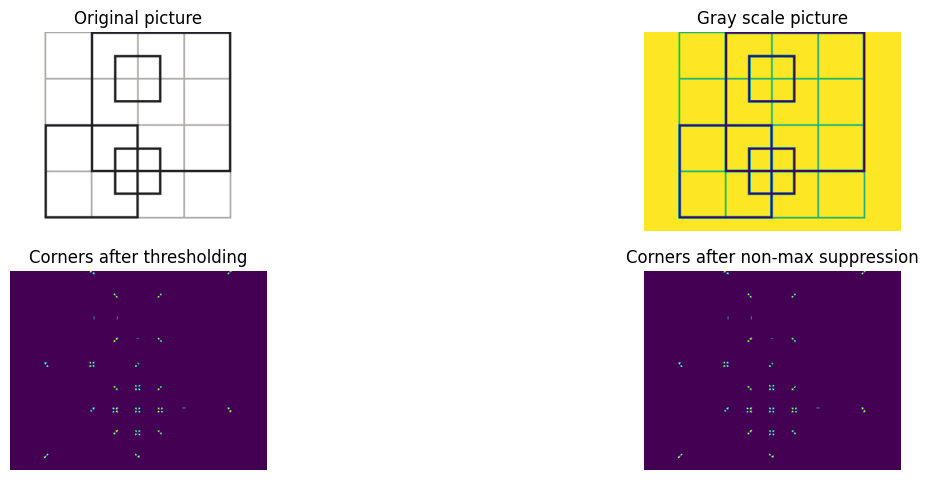

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


Original_image = cv2.imread('box.jpg')
plt.subplot(5,2,1)
plt.imshow(Original_image)
plt.title("Original picture")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

def Gray_conversion(image):
  gray_image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
  return gray_image

Gray_Converted = Gray_conversion(Original_image)

plt.subplot(5,2,2)
plt.imshow(Gray_Converted)
plt.title("Gray scale picture")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

def convolve2d(image, kernel, stride):
  #flip the kernel horizontally and vertically
  kernel = np.flipud(np.fliplr(kernel))

  k_sizeX, k_sizeY = kernel.shape

  im_sizeX, im_sizeY = image.shape

  #Adding padding to the image
  padding = (k_sizeX-1)/2
  image = cv2.copyMakeBorder(image,int(padding),int(padding),int(padding),int(padding),
                             cv2.BORDER_CONSTANT, value = 0)

  #output image (convolved with image)
  output_height = int((im_sizeX-k_sizeX+2*padding)/stride)+1
  output_width = int((im_sizeY-k_sizeY+2*padding)/stride)+1
  output = np.zeros((output_height,output_width))
  
  for y in range(int(padding), im_sizeY+int(padding)-k_sizeY+1,stride):
    if y > im_sizeY-k_sizeY:
      break

    for x in range(int(padding), im_sizeX+int(padding)-k_sizeX+1,stride):
      if x > im_sizeX-k_sizeX:
        break

      output[int(x/stride),int(y/stride)] = (kernel * image[x:x+k_sizeX, y:y+k_sizeY]).sum()
      
  return output

def Spatial_Derivatives(image):
  Sx = np.array([[-1, 0, 1],
               [ -2, 0, 2],
               [-1, 0, 1]])
  Sy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])
  
  Gx = convolve2d(image,Sx,1)
  Gy = convolve2d(image,Sy, 1)

  return Gx, Gy

def Prod_Derivatives(Gx,Gy):
  Ix2 = Gx ** 2
  Ix2 = cv2.GaussianBlur(Ix2,(5,5),sigmaX=0, sigmaY=0)
  Iy2 = Gy ** 2
  Iy2 = cv2.GaussianBlur(Iy2,(5,5),sigmaX=0, sigmaY=0)
  Ixy = Gx*Gy
  Ixy = cv2.GaussianBlur(Ixy,(5,5),sigmaX=0, sigmaY=0)
  return Ix2, Iy2, Ixy

def Detector_Response(Ix2,Iy2,Ixy,k):
  detM = Ix2*Iy2 - Ixy**2
  traceM = Ix2 + Iy2
  R = detM - k*(traceM**2)
  return R

def Thresholding(R, T, image):
  threshold = T * np.max(R)
  corners = np.zeros_like(image)
  corners[R>threshold] = 255
  return corners

def non_max_suppression(R, size):
    h, w = R.shape
    suppressed = np.zeros((h, w), dtype=np.float32)

    margin = size // 2
    suppressed[:margin, :] = 0
    suppressed[-margin:, :] = 0
    suppressed[:, :margin] = 0
    suppressed[:, -margin:] = 0

    for i in range(margin, h-margin):
        for j in range(margin, w-margin):
            patch = R[i-margin:i+margin+1, j-margin:j+margin+1]

            if patch.max() == R[i, j]:
                suppressed[i, j] = R[i, j]

    return suppressed


Gx,Gy = Spatial_Derivatives(Gray_Converted)
Ix2,Iy2,Ixy = Prod_Derivatives(Gx,Gy)
R = Detector_Response(Ix2,Iy2, Ixy,0.05)
Thresholded = Thresholding(R,0.1,Gray_Converted)
Non_Max_Suppressed = non_max_suppression(Thresholded,3)


plt.subplot(5,2,3)
plt.imshow(Thresholded)
plt.title("Corners after thresholding")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

plt.subplot(5,2,4)
plt.imshow(Non_Max_Suppressed)
plt.title("Corners after non-max suppression")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

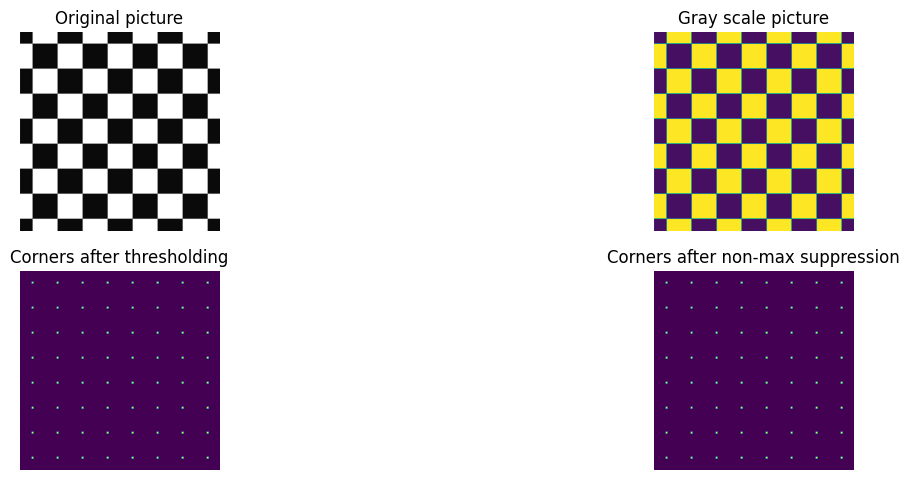

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


Original_image = cv2.imread('Box2.jpg')
plt.subplot(5,2,1)
plt.imshow(Original_image)
plt.title("Original picture")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

def Gray_conversion(image):
  gray_image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
  return gray_image

Gray_Converted = Gray_conversion(Original_image)

plt.subplot(5,2,2)
plt.imshow(Gray_Converted)
plt.title("Gray scale picture")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

def convolve2d(image, kernel, stride):
  #flip the kernel horizontally and vertically
  kernel = np.flipud(np.fliplr(kernel))

  k_sizeX, k_sizeY = kernel.shape

  im_sizeX, im_sizeY = image.shape

  #Adding padding to the image
  padding = (k_sizeX-1)/2
  image = cv2.copyMakeBorder(image,int(padding),int(padding),int(padding),int(padding),
                             cv2.BORDER_CONSTANT, value = 0)

  #output image (convolved with image)
  output_height = int((im_sizeX-k_sizeX+2*padding)/stride)+1
  output_width = int((im_sizeY-k_sizeY+2*padding)/stride)+1
  output = np.zeros((output_height,output_width))
  
  for y in range(int(padding), im_sizeY+int(padding)-k_sizeY+1,stride):
    if y > im_sizeY-k_sizeY:
      break

    for x in range(int(padding), im_sizeX+int(padding)-k_sizeX+1,stride):
      if x > im_sizeX-k_sizeX:
        break

      output[int(x/stride),int(y/stride)] = (kernel * image[x:x+k_sizeX, y:y+k_sizeY]).sum()
      
  return output

def Spatial_Derivatives(image):
  Sx = np.array([[-1, 0, 1],
               [ -2, 0, 2],
               [-1, 0, 1]])
  Sy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])
  
  Gx = convolve2d(image,Sx,1)
  Gy = convolve2d(image,Sy, 1)

  return Gx, Gy

def Prod_Derivatives(Gx,Gy):
  Ix2 = Gx ** 2
  Ix2 = cv2.GaussianBlur(Ix2,(5,5),sigmaX=0, sigmaY=0)
  Iy2 = Gy ** 2
  Iy2 = cv2.GaussianBlur(Iy2,(5,5),sigmaX=0, sigmaY=0)
  Ixy = Gx*Gy
  Ixy = cv2.GaussianBlur(Ixy,(5,5),sigmaX=0, sigmaY=0)
  return Ix2, Iy2, Ixy

def Detector_Response(Ix2,Iy2,Ixy,k):
  detM = Ix2*Iy2 - Ixy**2
  traceM = Ix2 + Iy2
  R = detM - k*(traceM**2)
  return R

def Thresholding(R, T, image):
  threshold = T * np.max(R)
  corners = np.zeros_like(image)
  corners[R>threshold] = 255
  return corners

def non_max_suppression(R, size):
    h, w = R.shape
    suppressed = np.zeros((h, w), dtype=np.float32)

    margin = size // 2
    suppressed[:margin, :] = 0
    suppressed[-margin:, :] = 0
    suppressed[:, :margin] = 0
    suppressed[:, -margin:] = 0

    for i in range(margin, h-margin):
        for j in range(margin, w-margin):
            patch = R[i-margin:i+margin+1, j-margin:j+margin+1]

            if patch.max() == R[i, j]:
                suppressed[i, j] = R[i, j]

    return suppressed


Gx,Gy = Spatial_Derivatives(Gray_Converted)
Ix2,Iy2,Ixy = Prod_Derivatives(Gx,Gy)
R = Detector_Response(Ix2,Iy2, Ixy,0.05)
Thresholded = Thresholding(R,0.1,Gray_Converted)
Non_Max_Suppressed = non_max_suppression(Thresholded,3)


plt.subplot(5,2,3)
plt.imshow(Thresholded)
plt.title("Corners after thresholding")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)

plt.subplot(5,2,4)
plt.imshow(Non_Max_Suppressed)
plt.title("Corners after non-max suppression")
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 15)